In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
with open("data/thermal_analysis2.log", 'r') as f:
    raw_data = f.readlines()

temps = []
curtemps = []
last_curtemps = []
times = []
for line in raw_data:
    if "Temps" in line:
        split = line.strip().split(" ")
        times.append(split[0])
        curtemps = [float(i) for i in split[2:6]]
    if "Groundtruth" in line:
        split = line.strip()[:-2].split(" ")
        curtemps.append(float(split[2]))
        for i in range(len(curtemps)):
            if curtemps[i] < 0:
                curtemps[i] = last_curtemps[i]
        
        temps.append(curtemps)
        last_curtemps = curtemps

names = ["analog", "d1", "d2", "d3", "groundtruth"]
times = [datetime.datetime.strptime(t, '[%H:%M:%S:%f]') for t in times]
#print(times)

<IPython.core.display.Javascript object>


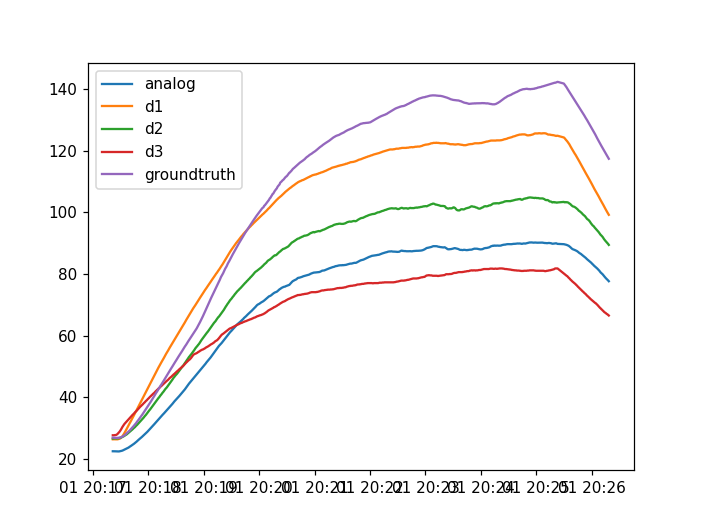

In [3]:
data = np.array(temps)

plt.figure()
for i, name in enumerate(names):
    plt.plot(times, data[:, i], label=name)
plt.legend()
plt.show()